In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [22]:
df = pd.read_csv("insurance-data.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.shape

(1338, 7)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Number of smokers:
 no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:ylabel='smoker'>

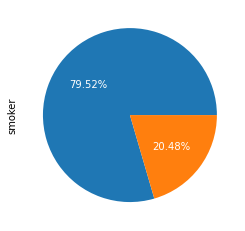

In [61]:
print("Number of smokers:\n",df['smoker'].value_counts())
counts = df['smoker'].value_counts()
counts.plot.pie(autopct='%.2f%%',textprops={'color':"w"})
# percentage of smokers in this dataset is way lower than the non smokers (about 80% non-smokers and 20% smokers)




male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

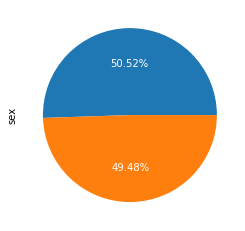

In [63]:
print(df['sex'].value_counts())
counts = df['sex'].value_counts()
counts.plot.pie(autopct='%.2f%%',textprops={'color':"w"})

# females and males are ratios are 50-50 in this dataset which will hopefully give us somewhat accurate results to compare between both sexs.

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='smoker', ylabel='count'>

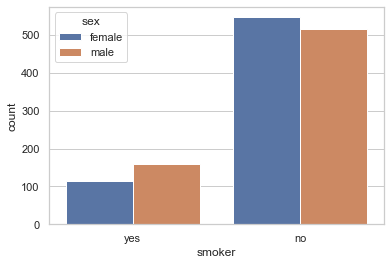

In [84]:
#amount of male and female smokers vs non-smokers
sns.countplot('smoker',data=df,hue='sex')
# as seen in the chart below female non-smokers were more than male non-smokers but they weren't far behind while male smokers were more than female smokers aslo were not far behind.

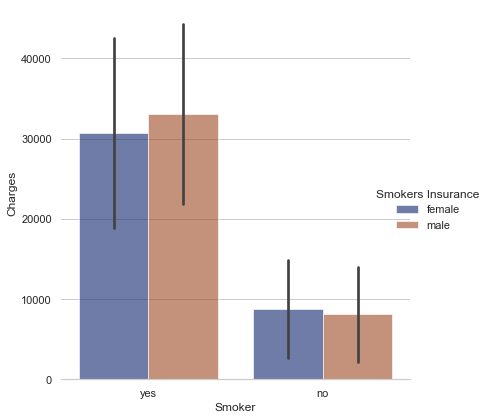

In [91]:
#relation between being a male-female smoker and insurance paid 
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="smoker", y="charges", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Smoker", "Charges")
g.legend.set_title("Smokers Insurance")

#as seen in the chart below, male smokers paid more in insurance charges than female smokers while female non-smokers paid more in insurcance than male non-smokers.

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='smoker', ylabel='count'>

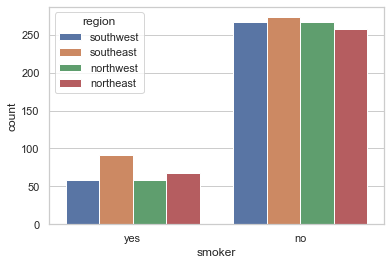

In [94]:
#regions with the most smokers or non smokers compared to others
sns.countplot('smoker',data=df,hue='region')
# the highest smoking region was the southeast region and the lowest smoking region was about tied between south and north west
# the number of non smokers was pretty close between all regions but southwest also had the highest number of non smokers also within our dataset

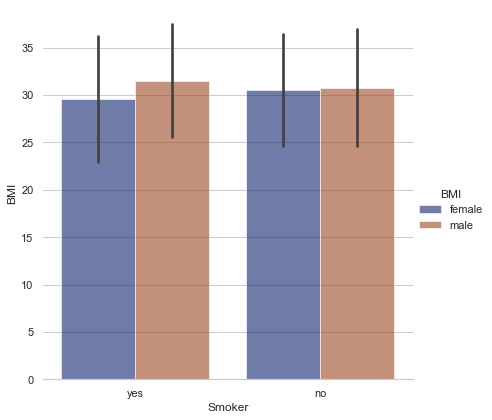

In [99]:
#relation between smoking and Body Mass Index score for females and males
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="smoker", y="bmi", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Smoker", "BMI")
g.legend.set_title("BMI")

# relation between smoking males and females with increase in BMI:
# smoking males had higher BMI than smoking females, while non smoking males and females has similar BMI it would be redundant to even compare them.

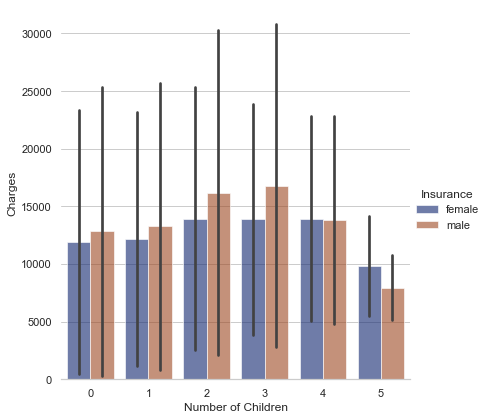

In [106]:
#relation between having children as a male or female and insurance paid
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="children", y="charges", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Number of Children", "Charges")
g.legend.set_title("Insurance")

# the relation between numbers of children and insurance paid:
# males with 2 to 3 children had the highest insurance charges (above 15k) across this dataset.
# females with 2-3-4 children had similar insurance charges (a bit under 15k)
# males and females with 5 children had the lowest insurance charges paid across this dataset(under 10k) with males being lower than females.